In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
dataset= pd.read_csv('Student_Performance.csv')

## We have imported the dataset now, let us proceed with the EDA

In [3]:
dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23
9996,7,64,Yes,8,5,58
9997,6,83,Yes,8,5,74
9998,9,97,Yes,7,0,95


In [16]:
print(dataset.dtypes,"\n")

print(""" We are going to be dealing with a dataset that has 10,000 rows, 6 columns, where there are:
    
    4 continuous variables
    1 categorical nominal variable
    1 target variable : Performance Index""")

Hours Studied                        int64
Previous Scores                      int64
Extracurricular Activities          object
Sleep Hours                          int64
Sample Question Papers Practiced     int64
Performance Index                    int64
dtype: object 

 We are going to be dealing with a dataset that has 10,000 rows, 6 columns, where there are:

    4 continuous variables
    1 categorical nominal variable
    1 target variable : Performance Index


In [8]:
dataset.isnull().sum()
#No Null values, let us now proceed to understand stats and distribution of the dataset

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [67]:
print(dataset['Extracurricular Activities'].value_counts())
print("\n",dataset['Extracurricular Activities'].unique())

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

 ['Yes' 'No']


In [23]:
print(dataset.describe())

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

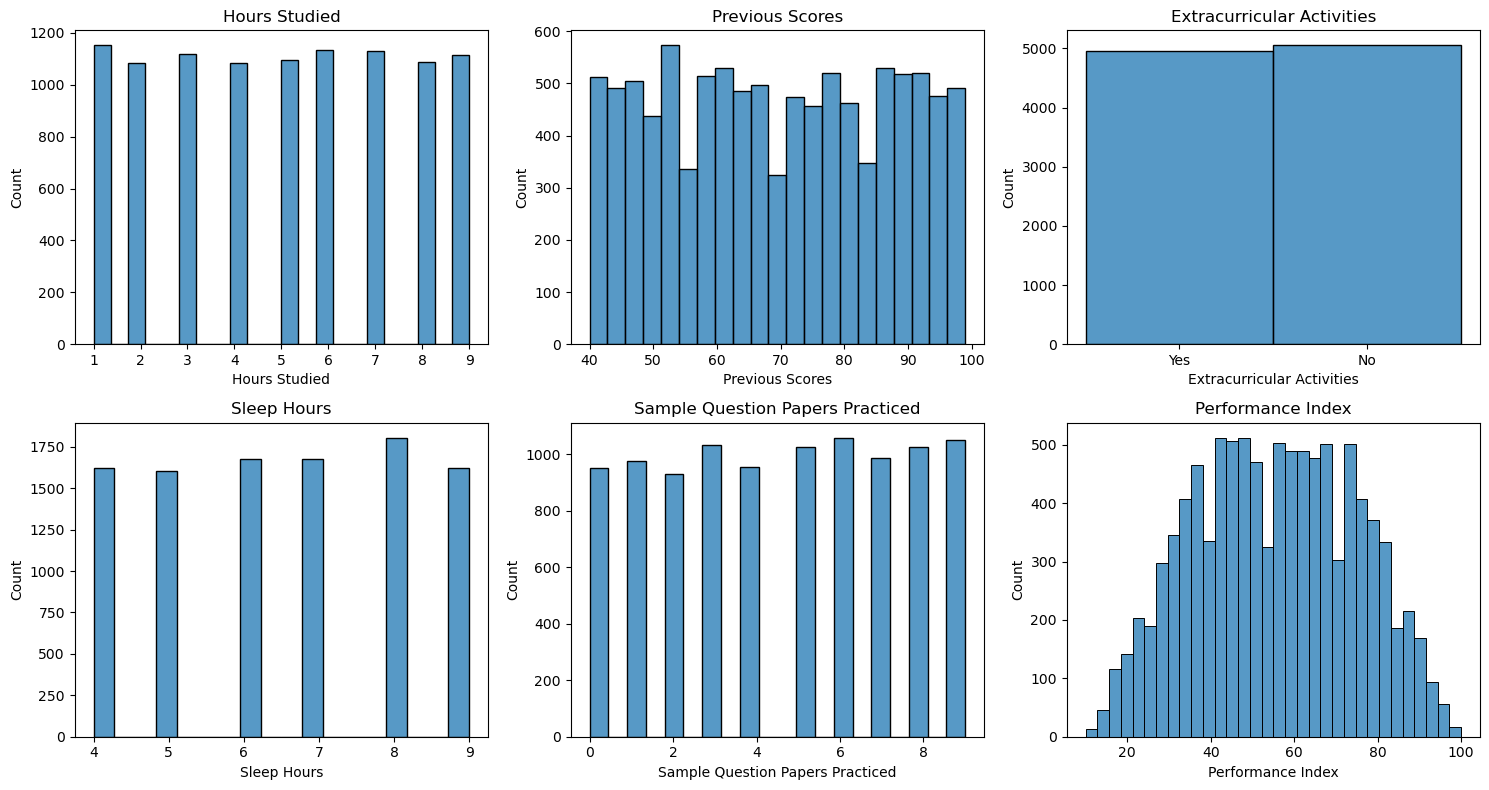

In [62]:
# Set up the figure and axes (2 rows × 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 6 plots

# Flatten axes for easy iteration
axes = axes.flatten()

# Feature names to plot
features = [
    "Hours Studied",
    "Previous Scores",
    "Extracurricular Activities",
    "Sleep Hours",
    "Sample Question Papers Practiced",
    "Performance Index"
]

# Plot each feature
for i, feature in enumerate(features):
    sns.histplot(data=dataset, x=feature, ax=axes[i])
    axes[i].set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()


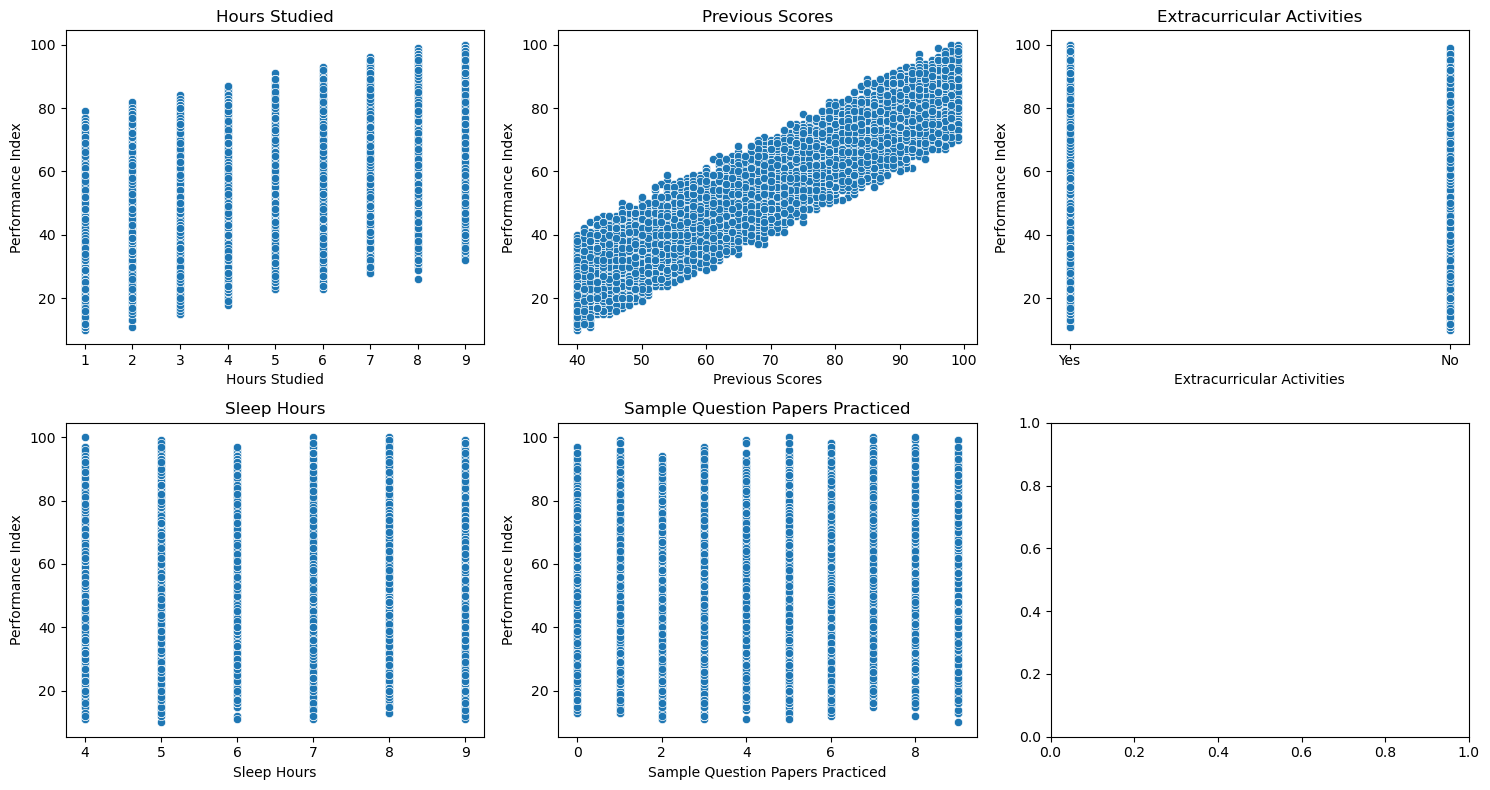

In [65]:
# Set up the figure and axes (2 rows × 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 6 plots

# Flatten axes for easy iteration
axes = axes.flatten()

# Feature names to plot
features = [
    "Hours Studied",
    "Previous Scores",
    "Extracurricular Activities",
    "Sleep Hours",
    "Sample Question Papers Practiced"
]

# Plot each feature
for i, feature in enumerate(features):
    sns.scatterplot(data=dataset, x=feature, y="Performance Index", ax=axes[i])
    axes[i].set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

In [39]:
dataset['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

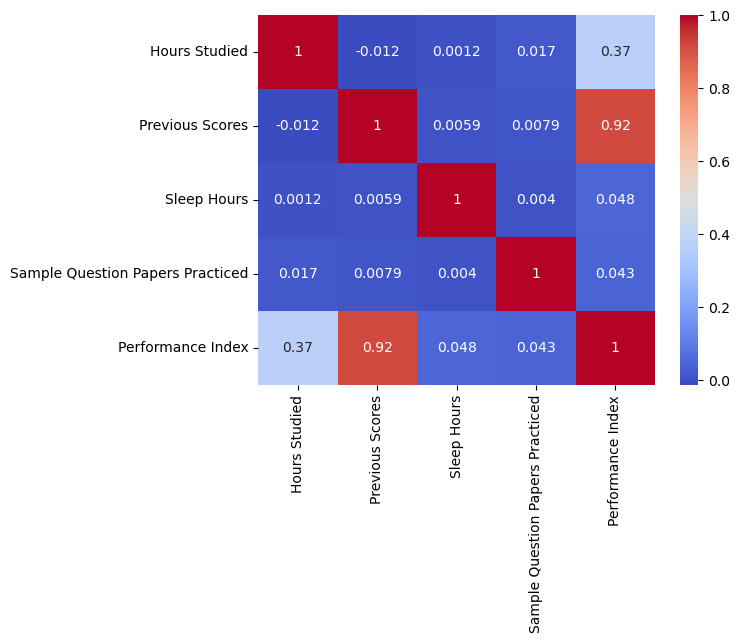

In [63]:
# Compute correlation matrix
correlation_matrix = dataset.corr(numeric_only=True)

# Plot correlation heatmap
sns.heatmap(correlation_matrix,cmap="coolwarm", annot=True)

# Display heatmap
plt.show()

In [60]:
print("""
- Previous Scores has a strong linear correlation with Performance Index (0.92) : great predictor.
- Hours Studied has moderate correlation (0.37) : could be useful.
- Sleep Hours and Sample Question Papers Practiced are very weakly correlated (but not useless yet; could somehow contribute in multivariate sense).
- No problematic multicollinearity between features : safe for MLR.
""")


- Previous Scores has a strong linear correlation with Performance Index (0.92) : great predictor.
- Hours Studied has moderate correlation (0.37) : could be useful.
- Sleep Hours and Sample Question Papers Practiced are very weakly correlated (but not useless yet; could somehow contribute in multivariate sense).
- No problematic multicollinearity between features : safe for MLR.



## This concludes our EDA, we can proceed now with preprocessing

In [72]:
# Applying binary encoding for categorical variable : Extracurriclar
# CAUTION : EXECUTE THIS CELL ONLY ONCE
dataset['Extracurricular Activities']= dataset['Extracurricular Activities'].map({'Yes':1, 'No':0})
dataset['Extracurricular Activities']

0       1
1       0
2       1
3       1
4       0
       ..
9995    1
9996    1
9997    1
9998    1
9999    0
Name: Extracurricular Activities, Length: 10000, dtype: int64

In [75]:
# Applying Standard Scaler for continuous variables:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()

#CAUTION : EXECUTE CELL ONCE 
#Columns to be scaled
cols= ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

dataset[cols] = scaler.fit_transform(dataset[cols])

In [90]:
dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1,1.456205,-1.249754,91
1,-0.383481,0.723913,0,-1.492294,-0.900982,65
2,1.161410,-1.063626,1,0.276805,-0.900982,45
3,0.002742,-1.005963,1,-0.902594,-0.900982,36
4,0.775188,0.320275,0,0.866505,0.145333,66
...,...,...,...,...,...,...
9995,-1.542149,-1.178951,1,-1.492294,-0.900982,23
9996,0.775188,-0.314013,1,0.866505,0.145333,58
9997,0.388965,0.781575,1,0.866505,0.145333,74
9998,1.547633,1.588851,1,0.276805,-1.598526,95


## This concludes preprocessing, time to split the data into train-test split 80-20 for this case

In [93]:
from sklearn.model_selection import train_test_split

# Define dependent and target variables
X = dataset.drop("Performance Index", axis=1)
y = dataset["Performance Index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## Fitting the model

In [94]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [106]:
print("Model intercept is : ", model.intercept_)      # base prediction when all features are zero
print("Model coefficients are : ", model.coef_)           # list of coefficients per feature

Model intercept is :  54.91459849843361
Model coefficients are :  [ 7.37468718 17.64577611  0.60959862  0.82726277  0.55198259]


In [109]:
print(pd.Series(model.coef_, index=X.columns))
print("\nModel intercept is the constant Beta_0")

Hours Studied                        7.374687
Previous Scores                     17.645776
Extracurricular Activities           0.609599
Sleep Hours                          0.827263
Sample Question Papers Practiced     0.551983
dtype: float64

Model intercept is the constant Beta_0


$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5 
$$
Where - $$ X_1 = Hours Studied , X_2 = Previous Scores , X_3 = Extracurricular Activities ,X_4 = Sleep Hours , X_5 = Sample Question Papers Practiced $$
and constants $$ \beta_1 = 7.374687 , \beta_2 = 17.645776 , \beta_3 = 0.609599 , \beta_4 = 0.827263 , \beta_5 = 0.551983 $$

## Understanding model performance

In [101]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


MAE: 1.622
MSE: 4.144
RMSE: 2.036
R² Score: 0.989


## Residual Analysis

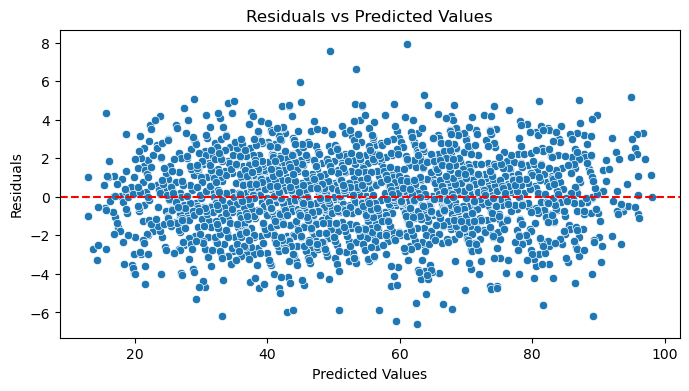

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

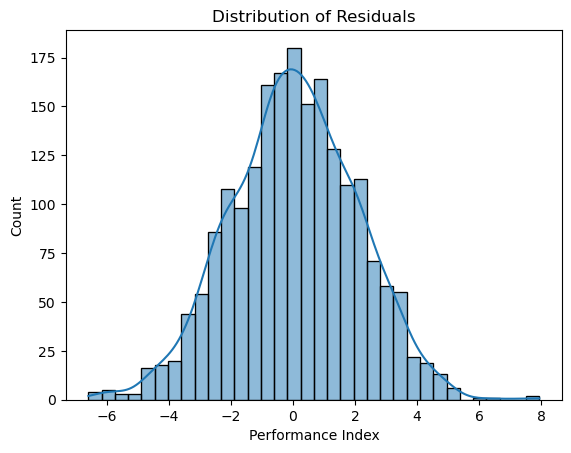

In [103]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()


## Heres what we can tell based upon our residual analysis:
### For the first plot (Residuals vs Predicted values)
What looks good:
- **No clear pattern**: The residuals are randomly scattered around the horizontal line at 0, which supports the assumption of linearity and indicates that the model is not systematically under or over-predicting.
- **Constant spread**: The variance of the residuals appears roughly constant across the range of predicted values, suggesting *homoscedasticity* i.e spread (variance) of residuals is roughly the same across all levels of predicted values.


### For the second plot : (Distribution of Residuals)
This histogram with KDE overlay is used to evaluate the *normality* of residuals

What looks good:
- The residuals form a **bell-shaped curve**, closely following a normal distribution.

To conclude, this model appears to generalize well.